In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run 'time.ipynb'

### Docs Meta, source_id and publisher_id substitutes

In [3]:
docs_meta = pd.read_csv("../download/documents_meta.csv") 
docs_meta.head()

,document_id,source_id,publisher_id,publish_time
0,1595802,1.0,603.0,2016-06-05 00:00:00
1,1524246,1.0,603.0,2016-05-26 11:00:00
2,1617787,1.0,603.0,2016-05-27 00:00:00
3,1615583,1.0,603.0,2016-06-07 00:00:00
4,1615460,1.0,603.0,2016-06-20 00:00:00


In [4]:
docs_meta.count()

document_id     2999334
source_id       2996816
publisher_id    2935310
publish_time    1988216
dtype: int64

#### Time

In [5]:
docs_meta['publish_timestamp'] = docs_meta['publish_time'].apply(time_ms)

In [6]:
docs_meta_unread = docs_meta[docs_meta['publish_time']>'2016-06-29']
print len(docs_meta_unread)
print docs_meta_unread['publish_time'].min(), docs_meta_unread['publish_time'].max()

12060
2016-06-29 00:00:00 9953-03-01 00:00:00


In [7]:
docs_meta.loc[list(docs_meta['publish_time']>'2016-06-29'),'publish_timestamp'] = float('NaN')

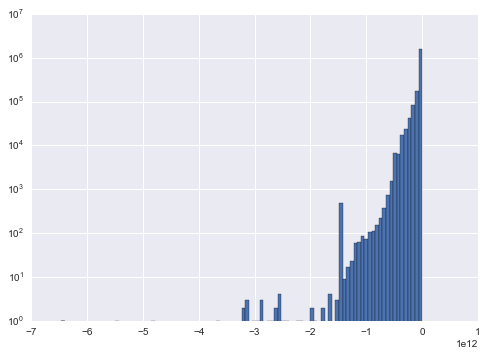

In [8]:
docs_meta['publish_timestamp'].hist(bins = 100, log = True)

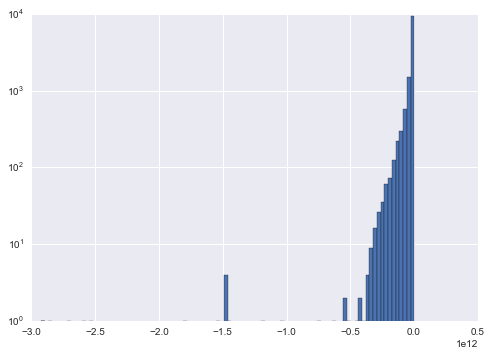

In [17]:
timestampMeanPerSource = pd.DataFrame({'timestampMeanPerSource' : docs_meta.groupby('source_id')['publish_timestamp'].mean()}).reset_index()
timestampMeanPerSource['timestampMeanPerSource'].hist(bins=100, log=True)

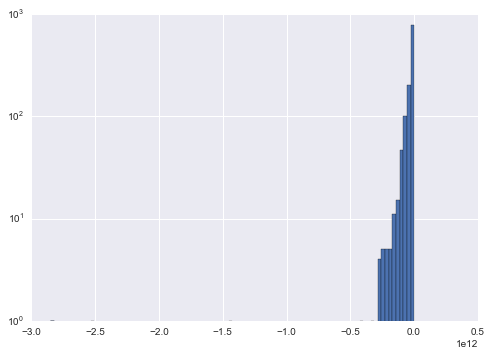

In [18]:
timestampMeanPerPublisher = pd.DataFrame({'timestampMeanPerPublisher' : docs_meta.groupby('publisher_id')['publish_timestamp'].mean()}).reset_index()
timestampMeanPerPublisher['timestampMeanPerPublisher'].hist(bins=100, log=True)

In [15]:
docs_meta = pd.merge(docs_meta, timestampMeanPerSource, how='left', on='source_id')
docs_meta.head()

,document_id,source_id,publisher_id,publish_time,publish_timestamp,timestampMeanPerSource
0,1595802,1.0,603.0,2016-06-05 00:00:00,-7.920000e+08,-1.074138e+11
1,1524246,1.0,603.0,2016-05-26 11:00:00,-1.616400e+09,-1.074138e+11
2,1617787,1.0,603.0,2016-05-27 00:00:00,-1.569600e+09,-1.074138e+11
3,1615583,1.0,603.0,2016-06-07 00:00:00,-6.192000e+08,-1.074138e+11
4,1615460,1.0,603.0,2016-06-20 00:00:00,5.040000e+08,-1.074138e+11


In [16]:
index = docs_meta['publish_timestamp'].isnull()
docs_meta.loc[index, 'publish_timestamp'] = docs_meta[index]['timestampMeanPerSource']
docs_meta.count()

document_id               2999334
source_id                 2996816
publisher_id              2935310
publish_time              1988216
publish_timestamp         2910791
timestampMeanPerSource    2908914
dtype: int64

In [21]:
timestamp_mean = docs_meta['publish_timestamp'].mean()
index = docs_meta['publish_timestamp'].isnull()
docs_meta.loc[index, 'publish_timestamp'] = timestamp_mean
docs_meta.count()

document_id               2999334
source_id                 2996816
publisher_id              2935310
publish_time              1988216
publish_timestamp         2999334
timestampMeanPerSource    2908914
dtype: int64

In [22]:
docs_meta = docs_meta.drop(['publish_time', 'timestampMeanPerSource'], axis=1)

In [23]:
docs_meta.head()

,document_id,source_id,publisher_id,publish_timestamp
0,1595802,1.0,603.0,-7.920000e+08
1,1524246,1.0,603.0,-1.616400e+09
2,1617787,1.0,603.0,-1.569600e+09
3,1615583,1.0,603.0,-6.192000e+08
4,1615460,1.0,603.0,5.040000e+08


#### Publisher_id fix based on source_id - not possible

#### Substitutes for source_id and publisher_id

In [24]:
docsPerSource = pd.DataFrame({'docsPerSource': docs_meta.groupby('source_id').size() }).reset_index()
docsPerSource['docsPerSource'].describe()

count     14394.000000
mean        208.198972
std        2790.495213
min           1.000000
25%           1.000000
50%           6.000000
75%          61.000000
max      235463.000000
Name: docsPerSource, dtype: float64

In [25]:
docsPerPublisher = pd.DataFrame({'docsPerPublisher': docs_meta.groupby('publisher_id').size() }).reset_index()
docsPerPublisher['docsPerPublisher'].describe()

count      1259.000000
mean       2331.461477
std       11318.797955
min           1.000000
25%           4.000000
50%          91.000000
75%        1136.500000
max      239495.000000
Name: docsPerPublisher, dtype: float64

In [27]:
sourcesPublisher = pd.DataFrame({'size': docs_meta.groupby(['source_id', 'publisher_id']).size() }).reset_index().drop('size', axis=1)
sourcesPerPublisher = pd.DataFrame({'sourcesPerPublisher': sourcesPublisher.groupby('publisher_id').size() }).reset_index()
sourcesPerPublisher['sourcesPerPublisher'].describe()

count    1259.000000
mean        7.415409
std        44.348971
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       908.000000
Name: sourcesPerPublisher, dtype: float64

In [28]:
docs_meta[(docs_meta['source_id'].isnull())&(docs_meta['publisher_id'].notnull())].count()

document_id          0
source_id            0
publisher_id         0
publish_timestamp    0
dtype: int64

In [29]:
docs_meta[(docs_meta['source_id'].notnull())&(docs_meta['publisher_id'].isnull())].count()

document_id          61506
source_id            61506
publisher_id             0
publish_timestamp    61506
dtype: int64

In [30]:
docs_meta = pd.merge(docs_meta, docsPerSource, how='left', on='source_id')
docs_meta = pd.merge(docs_meta, docsPerPublisher, how='left', on='publisher_id')
docs_meta = pd.merge(docs_meta, sourcesPerPublisher, how='left', on='publisher_id')
docs_meta.count()

document_id            2999334
source_id              2996816
publisher_id           2935310
publish_timestamp      2999334
docsPerSource          2996816
docsPerPublisher       2935310
sourcesPerPublisher    2935310
dtype: int64

In [31]:
docs_meta['ratioPubSource'] = docs_meta['docsPerPublisher'] / docs_meta['docsPerSource']
docs_meta['ratioPubSource'].describe()

count    2.935310e+06
mean     8.026333e+01
std      8.526027e+02
min      1.000000e+00
25%      1.017124e+00
50%      2.286096e+00
75%      1.893023e+01
max      2.394950e+05
Name: ratioPubSource, dtype: float64

In [32]:
docsPerSource_mean = docs_meta['docsPerSource'].mean()
index = docs_meta['docsPerSource'].isnull()
docs_meta.loc[index, 'docsPerSource'] = docsPerSource_mean
docs_meta.count()

document_id            2999334
source_id              2996816
publisher_id           2935310
publish_timestamp      2999334
docsPerSource          2999334
docsPerPublisher       2935310
sourcesPerPublisher    2935310
ratioPubSource         2935310
dtype: int64

In [34]:
index = docs_meta['publisher_id'].isnull()
docs_meta.loc[index, 'docsPerPublisher'] = docs_meta[index]['docsPerSource']
docs_meta.loc[index, 'sourcesPerPublisher'] = 1
docs_meta.loc[index, 'ratioPubSource'] = 1
docs_meta.count()

document_id            2999334
source_id              2996816
publisher_id           2935310
publish_timestamp      2999334
docsPerSource          2999334
docsPerPublisher       2999334
sourcesPerPublisher    2999334
ratioPubSource         2999334
dtype: int64

In [35]:
docs_meta = docs_meta.drop(['source_id', 'publisher_id'], axis=1)

In [37]:
docs_meta = docs_meta.drop(['sourcesPerPublisher', 'ratioPubSource'], axis=1)

In [39]:
docs_meta.count()

document_id          2999334
publish_timestamp    2999334
docsPerSource        2999334
docsPerPublisher     2999334
dtype: int64

In [64]:
docs_meta.columns = ['document_id', 'published', 'source_rate', 'publisher_rate']

In [70]:
docs_meta = docs_meta.astype({'document_id':int, 'published':int, 'source_rate':int, 'publisher_rate':int})

In [71]:
docs_meta.head()

,document_id,published,source_rate,publisher_rate
0,1595802,-791999998,12867,13109
1,1524246,-1616399998,12867,13109
2,1617787,-1569599998,12867,13109
3,1615583,-619199998,12867,13109
4,1615460,504000002,12867,13109


### Docs Topics, topic_id substitute
Q: Can it be usefull both for Events and Ads docs? - Yes (mostly)

In [2]:
docs_topics = pd.read_csv("../download/documents_topics.csv")
docs_topics.head()

,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


In [53]:
docs_topics.count()

document_id         11325960
topic_id            11325960
confidence_level    11325960
dtype: int64

In [54]:
print docs_topics['document_id'].nunique(), docs_topics['topic_id'].nunique()

2495423 300


In [55]:
docsPerTopic = pd.DataFrame({'docsPerTopic': docs_topics.groupby('topic_id')['confidence_level'].sum() }).reset_index()
docsPerTopic['docsPerTopic'].describe()

count      300.000000
mean      1845.673001
std       2491.150843
min         64.943634
25%        439.104630
50%        902.875527
75%       2167.035617
max      20485.524508
Name: docsPerTopic, dtype: float64

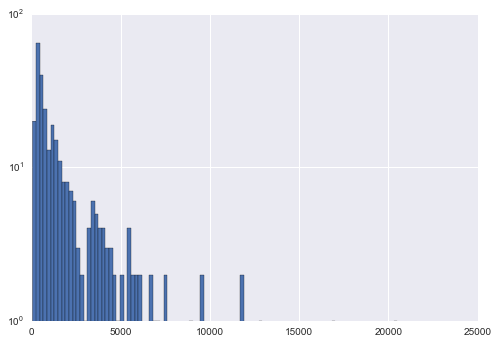

In [56]:
docsPerTopic['docsPerTopic'].hist(bins = 100, log=True)

In [57]:
docs_topics = pd.merge(docs_topics, docsPerTopic, on='topic_id')
docs_topics.count()

document_id         11325960
topic_id            11325960
confidence_level    11325960
docsPerTopic        11325960
dtype: int64

In [60]:
docs_topics['topic_rate'] = docs_topics['docsPerTopic'] * docs_topics['confidence_level']
docs_topics = pd.DataFrame({'topics_rate' : docs_topics.groupby('document_id')['topic_rate'].sum()}).reset_index()
docs_topics.count()

document_id    2495423
topics_rate    2495423
dtype: int64

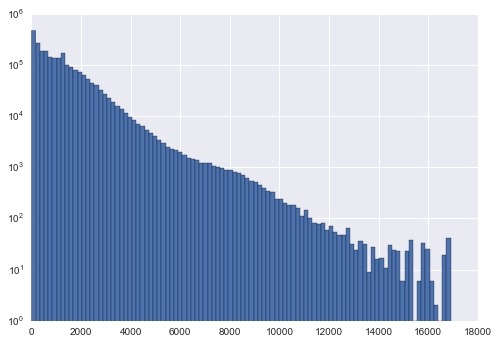

In [62]:
docs_topics['topics_rate'].hist(bins=100, log=True)

In [61]:
docs_topics.head()

,document_id,topics_rate
0,1,215.257321
1,2,91.779252
2,3,610.470561
3,4,1899.394378
4,5,1530.490553


### Doc Entities, entity_id substitutes

In [21]:
docs_ent = pd.read_csv("../download/documents_entities.csv")
docs_ent.head()

,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193


In [22]:
docs_ent.count()

document_id         5537552
entity_id           5537552
confidence_level    5537552
dtype: int64

In [23]:
d1 = docs_ent[docs_ent['document_id']==1524246]
d1

,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996


In [25]:
d2 = docs_ent[docs_ent['document_id']==1617787]
d2

,document_id,entity_id,confidence_level
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193
5,1617787,fb8c6cb0879e0de876298177eb1d3fcc,0.364116
6,1617787,793c6a6cf386edb820600d49df045475,0.349168
7,1617787,b525b84d5ed52a34565b8fb870555abe,0.287005
8,1617787,758cb9cb3014607cb4a691cbd485cc94,0.237957
9,1617787,d523aaba6d3916f8b7039fcce0f29639,0.235799
10,1617787,053e3ebba26a8d00e25cac594890887f,0.229953
11,1617787,935b2d2f0f49a80c2f720bdd6a563594,0.227938
12,1617787,3d0d43e01b616b4ff440019e8d295a2b,0.225750
13,1617787,74b442766892bbf15890f5f2ccfa3edb,0.217893


In [26]:
res = pd.merge(d1,d2, on='entity_id', how='outer').drop(['entity_id','document_id_x','document_id_y'], axis=1).fillna(0)
res

,confidence_level_x,confidence_level_y
0,0.672865,0.000000
1,0.399114,0.000000
2,0.392096,0.000000
3,0.213996,0.000000
4,0.000000,0.386193
5,0.000000,0.364116
6,0.000000,0.349168
7,0.000000,0.287005
8,0.000000,0.237957
9,0.000000,0.235799


In [74]:
print docs_ent['document_id'].nunique(), docs_ent['entity_id'].nunique()

1791420 1326009


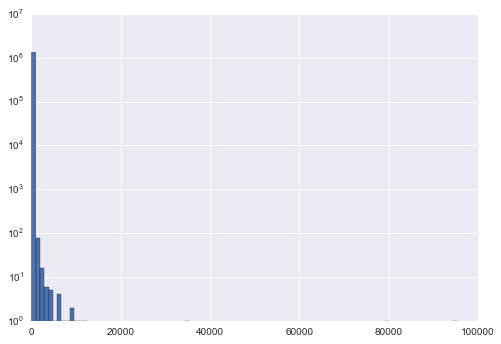

In [75]:
docsPerEntity = pd.DataFrame({'docsPerEntity': docs_ent.groupby('entity_id')['confidence_level'].sum() }).reset_index()
docsPerEntity['docsPerEntity'].hist(bins = 100, log=True)

In [76]:
docs_ent = pd.merge(docs_ent, docsPerEntity, on = ['entity_id'])
docs_ent['entity_rate'] = docs_ent['docsPerEntity'] * docs_ent['confidence_level']
docs_ent.head()

,document_id,entity_id,confidence_level,docsPerEntity,entity_rate
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865,0.933757,0.628293
1,2911488,f9eec25663db4cd83183f5c805186f16,0.260892,0.933757,0.243610
2,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114,1216.977680,485.712499
3,1543666,55ebcfbdaff1d6f60b3907151f38527a,0.309165,1216.977680,376.246576
4,1594007,55ebcfbdaff1d6f60b3907151f38527a,0.492292,1216.977680,599.108847


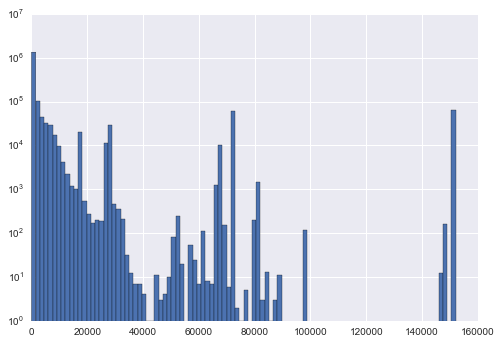

In [78]:
docs_ent = pd.DataFrame({'entities_rate' : docs_ent.groupby('document_id')['entity_rate'].sum()}).reset_index()
docs_ent['entities_rate'].hist(bins=100, log = True)

In [79]:
docs_ent.count()

document_id      1791420
entities_rate    1791420
dtype: int64

In [80]:
docs_ent.head()

,document_id,entities_rate
0,1,220.573757
1,2,527.769048
2,3,1651.091764
3,4,2.889939
4,5,25.697055


### Doc Categories, category ratings

In [81]:
docs_cat = pd.read_csv("../download/documents_categories.csv")
docs_cat.head()

,document_id,category_id,confidence_level
0,1595802,1611,0.92
1,1595802,1610,0.07
2,1524246,1807,0.92
3,1524246,1608,0.07
4,1617787,1807,0.92


In [82]:
docs_cat.count()

document_id         5481475
category_id         5481475
confidence_level    5481475
dtype: int64

In [83]:
print docs_cat['document_id'].nunique(), docs_cat['category_id'].nunique()

2828649 97


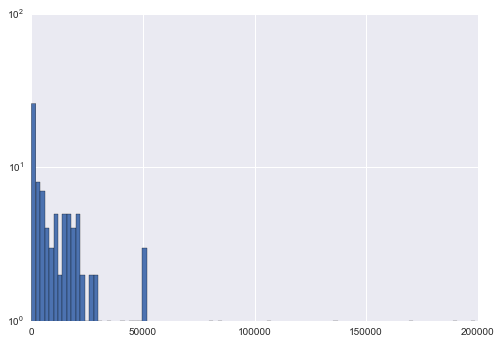

In [84]:
docsPerCategory = pd.DataFrame({'docsPerCategory': docs_cat.groupby('category_id')['confidence_level'].sum() }).reset_index()
docsPerCategory['docsPerCategory'].hist(bins = 100, log=True)

In [85]:
docs_cat = pd.merge(docs_cat, docsPerCategory, on = ['category_id'])
docs_cat['category_rate'] = docs_cat['docsPerCategory'] * docs_cat['confidence_level']
docs_cat.head()

,document_id,category_id,confidence_level,docsPerCategory,category_rate
0,1595802,1611,0.920000,21498.672176,19778.778402
1,1690964,1611,0.070000,21498.672176,1504.907052
2,1031288,1611,0.920000,21498.672176,19778.778402
3,54898,1611,0.920000,21498.672176,19778.778402
4,58679,1611,0.642974,21498.672176,13823.091544


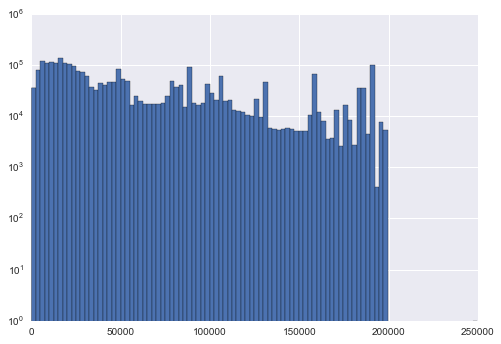

In [86]:
docs_cat = pd.DataFrame({'categories_rate' : docs_cat.groupby('document_id')['category_rate'].sum()}).reset_index()
docs_cat['categories_rate'].hist(bins=100, log = True)

In [87]:
docs_cat.count()

document_id        2828649
categories_rate    2828649
dtype: int64

In [88]:
docs_cat.head()

,document_id,categories_rate
0,1,20406.795957
1,2,35917.645011
2,3,19165.475665
3,4,20452.868821
4,5,10034.410651


### Documents Content - putting all together

In [89]:
print len(docs_meta), len(docs_topics), len(docs_cat)

2999334 2495423 2828649


In [90]:
docs_content = pd.merge(docs_meta, docs_topics, how='outer', on='document_id')
docs_content.count()

document_id       2999334
published         2999334
source_rate       2999334
publisher_rate    2999334
topics_rate       2495423
dtype: int64

In [91]:
docs_content = pd.merge(docs_content, docs_cat, how='outer', on='document_id')
docs_content.count()

document_id        2999334
published          2999334
source_rate        2999334
publisher_rate     2999334
topics_rate        2495423
categories_rate    2828649
dtype: int64

In [96]:
topics_rate_mean = docs_content['topics_rate'].mean()
index = docs_content['topics_rate'].isnull()
docs_content.loc[index, 'topics_rate'] = topics_rate_mean

In [99]:
categories_rate_mean = docs_content['categories_rate'].mean()
index = docs_content['categories_rate'].isnull()
docs_content.loc[index, 'categories_rate'] = categories_rate_mean

In [100]:
docs_content.count()

document_id        2999334
published          2999334
source_rate        2999334
publisher_rate     2999334
topics_rate        2999334
categories_rate    2999334
dtype: int64

In [102]:
docs_content.describe()

,document_id,published,source_rate,publisher_rate,topics_rate,categories_rate
count,2.999334e+06,2.999334e+06,2.999334e+06,2.999334e+06,2.999334e+06,2.999334e+06
mean,1.499668e+06,-1.343613e+09,3.760667e+04,5.605640e+04,1.153110e+03,6.323934e+04
std,8.658333e+05,1.213270e+09,7.855905e+04,7.824157e+04,1.133796e+03,5.417319e+04
min,1.000000e+00,-2.147484e+09,1.000000e+00,1.000000e+00,5.613869e-01,1.000000e+00
25%,7.498342e+05,-2.147484e+09,7.230000e+02,5.528000e+03,3.429482e+02,1.842055e+04
50%,1.499668e+06,-2.147484e+09,2.621000e+03,1.852500e+04,1.122601e+03,4.815615e+04
75%,2.249501e+06,-1.440000e+07,1.286700e+04,6.806500e+04,1.392363e+03,9.254834e+04
max,2.999334e+06,1.278000e+09,2.354630e+05,2.394950e+05,1.690061e+04,2.495278e+05


In [101]:
docs_content.head()

,document_id,published,source_rate,publisher_rate,topics_rate,categories_rate
0,1595802,-791999998,12867,13109,2480.972288,20805.522666
1,1524246,-1616399998,12867,13109,1470.516397,15822.734932
2,1617787,-1569599998,12867,13109,1612.316551,15822.734932
3,1615583,-619199998,12867,13109,1107.636052,3194.531922
4,1615460,504000002,12867,13109,625.365403,9414.412133


In [104]:
docs_content.to_csv("../generated/documents_content_all.csv", index=False) 

### Filtering document_id only for Events and Ads in Clicks
Q: Can meta, cat, topics, entities be usefull both for Events and Ads docs?  -  Yes (mostly) - see below

In [3]:
docs_content = pd.read_csv("../generated/documents_content_all.csv")
docs_content.count()

document_id        2999334
published          2999334
source_rate        2999334
publisher_rate     2999334
topics_rate        2999334
categories_rate    2999334
dtype: int64

##### Display pages document_ids (as used in Events)

In [4]:
events_docs = pd.DataFrame(pd.read_csv("../download/events.csv", usecols=['document_id'])['document_id'].unique(), columns=['document_id'])
events_docs.count()

document_id    894060
dtype: int64

##### Advertised document_ids (as used in Clicks)

In [6]:
ads = pd.read_csv("../download/promoted_content.csv", usecols=['ad_id', 'document_id'])
ads.count()

ad_id          559583
document_id    559583
dtype: int64

In [14]:
ads.head()

,ad_id,document_id
0,1,6614
1,2,471467
2,3,7692
3,4,471471
4,5,471472


In [11]:
clicks_train = pd.read_csv("../download/clicks_train.csv", usecols = ['ad_id'])
clicks_ad_id = pd.DataFrame({'ad_id':clicks_train['ad_id'].unique()})
clicks_test = pd.read_csv("../download/clicks_test.csv", usecols = ['ad_id'])
clicks_ad_id = clicks_ad_id.append(pd.DataFrame({'ad_id':clicks_test['ad_id'].unique()}))
clicks_ad_id = pd.DataFrame({'ad_id':clicks_ad_id['ad_id'].unique()})
clicks_ad_id.count()

ad_id    544300
dtype: int64

In [13]:
clicks_ad_id.head()

,ad_id
0,42337
1,139684
2,144739
3,156824
4,279295


In [15]:
clicks_ads_docs = pd.merge(clicks_ad_id, ads, how='left', on='ad_id')
clicks_ads_docs.count()

ad_id          544300
document_id    544300
dtype: int64

In [16]:
clicks_ads_docs = pd.DataFrame({'document_id':clicks_ads_docs['document_id'].unique()})
clicks_ads_docs.count()

document_id    184479
dtype: int64

##### All used document_ids

In [17]:
used_docs = pd.DataFrame({'document_id':events_docs.append(clicks_ads_docs)['document_id'].unique()})
used_docs.count()

document_id    1068018
dtype: int64

In [18]:
docs_content = used_docs.merge(docs_content, how = 'left', on='document_id')
docs_content.count()

document_id        1068018
published          1068018
source_rate        1068018
publisher_rate     1068018
topics_rate        1068018
categories_rate    1068018
dtype: int64

In [19]:
docs_content.to_csv("../generated/documents_content.csv", index=False) 